## Work_Period_2 Marisol De La Cruz

In [26]:
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np

1.	Write a Python function create_confusion_matrix(actual, predicted) that takes two lists of integers (actual and predicted) representing the true and predicted labels of a binary classification problem. The function should return a confusion matrix as a 2x2 nested list in the format: [TP, FN], [FP, TN]

In [27]:
def create_confusion_matrix(actual, predicted):
    
    TP = FN = FP = TN = 0
    
  
    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            TP += 1  # True Positive
        elif a == 0 and p == 0:
            TN += 1  # True Negative
        elif a == 1 and p == 0:
            FN += 1  # False Negative
        elif a == 0 and p == 1:
            FP += 1  # False positive

    
    return [[TP, FN], [FP, TN]]


actual_classes = pd.Series([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])
predicted_classes = pd.Series([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])


confusion_matrix = create_confusion_matrix(actual_classes, predicted_classes)

TP = confusion_matrix[0][0]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

print("Confusion Matrix:")
print(f"[[TP: {TP}, FN: {FN}], [FP: {FP}, TN: {TN}]]")

print("Confusion Matrix:", confusion_matrix)


Confusion Matrix:
[[TP: 6, FN: 2], [FP: 1, TN: 5]]
Confusion Matrix: [[6, 2], [1, 5]]


2.	Using the confusion matrix obtained from the first problem, write a Python function calculate_accuracy(matrix) that calculates and returns the accuracy of the classification model. Test your function using the confusion matrix from Problem 1

> Accuracy= (Total Number of Predictions)/(Number of Correct Predictions)

 > = (TP+TN)/(TP+TN+FP+FN)

>  Where:

> * TP = True Positives (correctly predicted positive cases)
> * TN = True Negatives (correctly predicted negative cases)
> * FP = False Positives (incorrectly predicted positive cases)
> * FN = False Negatives (incorrectly predicted negative cases)

In [28]:
def calculate_accuracy(matrix):
    # Extraer valores de la matriz de confusión
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return accuracy

confusion_matrix = [[6, 2], [1, 5]]

accuracy = calculate_accuracy(confusion_matrix)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7857142857142857


3.	Write a Python function calculate_precision_recall(matrix) that takes a confusion matrix as input and returns the precision and recall of the classification model. 

> * Precision= (True Positives (TP)) / (True Positives (TP) + False Positives (FP))

> **Recall** = (True Positives)/(True Positives + False Negatives)

Where:
- \( TP \) = True Positives
- \( FN \) = False Negatives


In [29]:
def calculate_precision_recall(matrix):
    # Extraer valores de la matriz de confusión
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
  
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    return precision, recall

confusion_matrix = [[6, 2], [1, 5]]

precision, recall = calculate_precision_recall(confusion_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.8571428571428571
Recall: 0.75


4.	Create a function calculate_f1_score(matrix) that computes the F1 score based on the confusion matrix. Use the confusion matrix and the results from Problem 3 to test your function.

> F1=   2 × ( Precision × Recall) / (Precision + Recall)

In [30]:
def calculate_f1_score(matrix):
    # Extract True Positives (TP), False Negatives (FN), False Positives (FP), True Negatives (TN)
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Calculate F1 score
    if (precision + recall) == 0:
        return 0
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return f1_score

# Example usage: confusion matrix from previous exercises
confusion_matrix = [[6, 2], [1, 5]]  # Example confusion matrix
f1 = calculate_f1_score(confusion_matrix)
print(f"F1 Score: {f1}")

F1 Score: 0.7999999999999999


5.	Write a Python script to visualize a confusion matrix using the matplotlib library. Create a function plot_confusion_matrix(matrix) that takes a confusion matrix and plots it using matplotlib. Label the axes as "Predicted" and "Actual", and add the TP, FP, FN, and TN values inside the cells. Use the confusion matrix from Problem 1 as input.

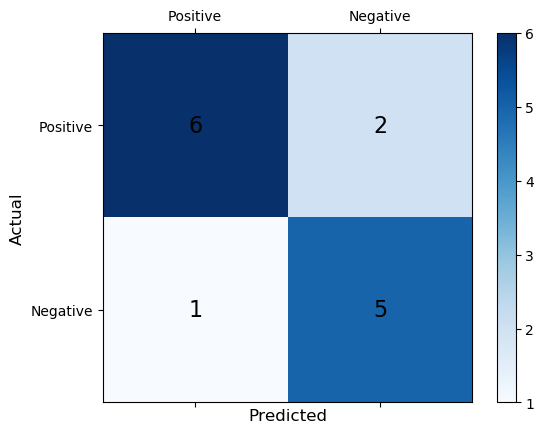

In [31]:
def plot_confusion_matrix(matrix):
    # Create the figure
    fig, ax = plt.subplots()

    # Set the axis labels
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)

    # Create the matrix heatmap
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)

    # Add color bar
    fig.colorbar(cax)

    # Add values inside the cells
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', fontsize=16)

    # Adjust axis labels
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Positive', 'Negative'])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Positive', 'Negative'])

    # Show the plot
    plt.show()

# Confusion matrix [TP, FN], [FP, TN] = [6, 2], [1, 5]
confusion_matrix = np.array([[6, 2], [1, 5]])

# Call the function to visualize the matrix
plot_confusion_matrix(confusion_matrix)
